# **1. Clusters(클러스터)**
* 유사한 특성을 가진 개체들의 집합
* 고객 분류, 유전자 분석, 이미지 분할

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=100, centers=3, random_state=2023)
# n_samples=100은 100개의 샘플 데이터를 생성
# centers=3은 3개의 중심(클러스터)을 생성
# random_state=2024은 랜덤 시드(seed)를 설정
# X는 생성된 샘플 데이터의 좌표를 담고 있는 배열
# y는 각 샘플이 속하는 클러스터의 레이블을 담고 있는 배열

In [ ]:
X = pd.DataFrame(X)
X

,0,1
0,1.183732,-8.288026
1,1.092865,-7.411113
2,-5.746528,0.425609
3,0.305555,-8.296799
4,-7.085940,-2.835521
...,...,...
95,-5.843954,7.807627
96,2.823700,-7.205193
97,1.151901,-8.539375
98,-3.377065,9.044279


In [ ]:
y

array([1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0])

<Axes: xlabel='0', ylabel='1'>

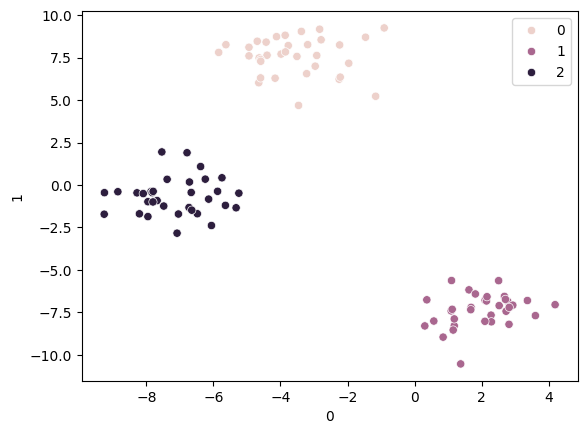

In [ ]:
sns.scatterplot(x=X[0], y=X[1], hue=y)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)
km.fit(X)
pred = km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

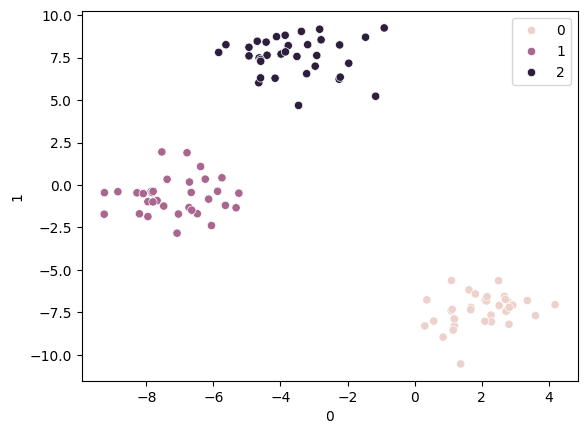

In [ ]:
sns.scatterplot(x=X[0], y=X[1], hue=pred)

In [ ]:
km = KMeans(n_clusters=5)
km.fit(X)
pred = km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

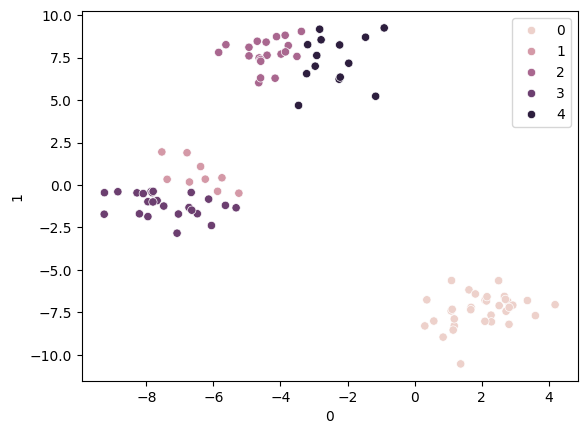

In [ ]:
sns.scatterplot(x=X[0], y=X[1], hue=pred)

In [ ]:
# 평가값: 하나의 클러스터안에 중심점으로부터 각각의 데이터 거리를 합한 값의 평균
km.inertia_

161.15478072681793

In [ ]:
# 각 K에 대한 inertia 값을 계산하고 리스트에 저장 클러스터 개수(K)
# inertia 값의 변화, 적절한 클러스터 개수를 결정하는 데 도움을 줍니다.
inertia_list = []

for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
inertia_list

[1578.856698952461,
 222.7636237762,
 187.54774629439763,
 161.69139039793578,
 135.29842483035605,
 112.16491847704935,
 91.46675593212618,
 82.02018993556224,
 75.65065391271312]

<Axes: >

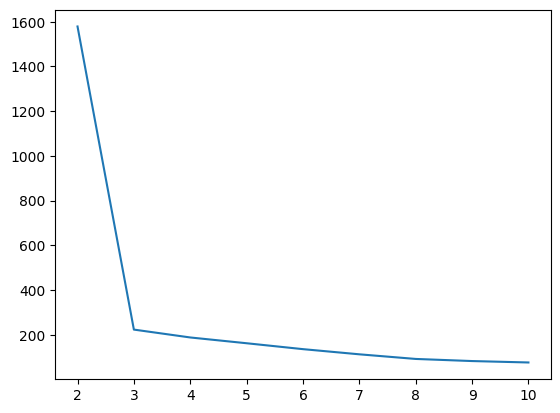

In [ ]:
sns.lineplot(x=range(2, 11), y=inertia_list) # 엘보우 메서드

# **2. marketing 데이터셋**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mkt_df = pd.read_csv('/content/drive/MyDrive/KDT/6. 머신러닝과 딥러닝/Data/marketing.csv')
mkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,182,42,118,247,2,9,3,4,5,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,30,0,0,8,7,8,2,5,7,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,217,32,12,24,1,2,3,13,6,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,214,80,30,61,2,6,5,10,3,0


In [ ]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* ID: 고객 아이디
* Year_Birth: 출생 연도
* Education: 학력
* Marital_Status: 결혼 여부
* Income: 소득
* Kidhome: 어린이 수
* Teenhome: 청소년 수
* Dt_Customer: 고객 등록일
* Recency: 마지막 구매일로부터 경과일
* MntWines: 와인 구매액
* MntFruits: 과일 구매액
* MntMeatProducts: 육류 구매액
* MntFishProducts: 어류 구매액
* MntSweetProducts: 단맛 제품 구매액
* MntGoldProds: 골드 제품 구매액
* NumDealsPurchases: 할인 행사 구매 수
* NumWebPurchases: 웹에서 구매 수
* NumCatalogPurchases: 카탈로그에서 구매 수
* NumStorePurchases: 매장에서의 구매 수
* NumWebVisitsMonth: 월별 웹 방문 수
* Complain: 불만 여부

In [ ]:
# 필요없는 컬럼 지우기
mkt_df.drop('ID', axis=1, inplace=True)
mkt_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [ ]:
mkt_df.sort_values('Year_Birth')
# Year_Birth: 1893,  Dt_Customer: 17-05-2014 => 130살 애매함..

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,1
1950,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0
424,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,716,55,0,21,0,7,10,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1995,Graduation,Single,71163.0,0,0,09-03-2014,30,283,17,372,138,106,44,1,3,8,12,1,0
1850,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,27,590,38,107,67,1,5,10,12,6,1
696,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,11,2,0,4,1,1,0,2,6,0
1170,1996,Basic,Married,14421.0,0,0,17-02-2014,81,0,0,2,3,3,8,1,1,0,2,5,0


In [ ]:
mkt_df.sort_values('Income')
# 제일 적은 사람 1730.0

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
1245,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,1,3,1,1,1,15,0,0,0,20,0
21,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,1,1725,1,1,1,15,0,28,0,1,0
1524,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,1,1,0,0,1,0,0,0,0,14,0
1846,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,0,1,1,1,1,15,0,0,0,19,0
1975,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,4,12,2,4,321,0,25,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


In [ ]:
mkt_df.sort_values('Income', ascending=False)
# 제일 많은 사람 666666.0 => 유난히 많음..?

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


In [ ]:
# 이렇게 코딩하면
# 20000보다 작은 것만 살리자 => 문제 NaN이 날아감
# mk_df = mk_df[mk_df['Income'] < 20000]  # NaN은 저장되지 않음
# NaN 살리는법
mkt_df = mkt_df[mkt_df['Income'] != 666666]

In [ ]:
# 666666 날아감
mkt_df.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


In [ ]:
mkt_df.isna().mean()

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010719
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
Complain               0.000000
dtype: float64

In [ ]:
# NaN 날리기
mkt_df = mkt_df.dropna()

In [ ]:
mkt_df.isna().mean()

Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Complain               0.0
dtype: float64

In [ ]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2215 non-null   int64  
 1   Education            2215 non-null   object 
 2   Marital_Status       2215 non-null   object 
 3   Income               2215 non-null   float64
 4   Kidhome              2215 non-null   int64  
 5   Teenhome             2215 non-null   int64  
 6   Dt_Customer          2215 non-null   object 
 7   Recency              2215 non-null   int64  
 8   MntWines             2215 non-null   int64  
 9   MntFruits            2215 non-null   int64  
 10  MntMeatProducts      2215 non-null   int64  
 11  MntFishProducts      2215 non-null   int64  
 12  MntSweetProducts     2215 non-null   int64  
 13  MntGoldProds         2215 non-null   int64  
 14  NumDealsPurchases    2215 non-null   int64  
 15  NumWebPurchases      2215 non-null   int64 

In [ ]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format='%d-%m-%Y')
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2215 non-null   int64         
 1   Education            2215 non-null   object        
 2   Marital_Status       2215 non-null   object        
 3   Income               2215 non-null   float64       
 4   Kidhome              2215 non-null   int64         
 5   Teenhome             2215 non-null   int64         
 6   Dt_Customer          2215 non-null   datetime64[ns]
 7   Recency              2215 non-null   int64         
 8   MntWines             2215 non-null   int64         
 9   MntFruits            2215 non-null   int64         
 10  MntMeatProducts      2215 non-null   int64         
 11  MntFishProducts      2215 non-null   int64         
 12  MntSweetProducts     2215 non-null   int64         
 13  MntGoldProds         2215 non-null   i

<ipython-input-28-d4db0c04b09b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format='%d-%m-%Y')


In [ ]:
# 마지막으로 가입된 사람을 기준으로 데이터의 가입 날짜(달)의 차를 구하기
# pass_month
mkt_df['pass_month'] = (mkt_df['Dt_Customer'].max().year * 12 + mkt_df['Dt_Customer'].max().month) - (mkt_df['Dt_Customer'].dt.year * 12 + mkt_df['Dt_Customer'].dt.month)
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,172,88,88,3,8,10,4,7,0,21
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,1,6,2,1,1,2,5,0,3
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,111,21,42,1,8,2,10,4,0,10
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,10,3,5,2,2,0,4,6,0,4
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,46,27,15,5,5,3,6,5,0,5


In [ ]:
# 삭제
mkt_df.drop('Dt_Customer', axis=1, inplace=True)
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,21
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,10
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,4
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,5


In [ ]:
# 와인 + 과일 + 육류 + 어류 + 단맛 + 골드
# Total_mnt
mkt_df['Total_mnt'] = mkt_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,88,88,3,8,10,4,7,0,21,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,6,2,1,1,2,5,0,3,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,21,42,1,8,2,10,4,0,10,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,3,5,2,2,0,4,6,0,4,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,27,15,5,5,3,6,5,0,5,422


In [ ]:
pd.set_option('display.max_columns', 30)
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,21,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,10,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,4,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,5,422


In [ ]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2215 non-null   int64  
 1   Education            2215 non-null   object 
 2   Marital_Status       2215 non-null   object 
 3   Income               2215 non-null   float64
 4   Kidhome              2215 non-null   int64  
 5   Teenhome             2215 non-null   int64  
 6   Recency              2215 non-null   int64  
 7   MntWines             2215 non-null   int64  
 8   MntFruits            2215 non-null   int64  
 9   MntMeatProducts      2215 non-null   int64  
 10  MntFishProducts      2215 non-null   int64  
 11  MntSweetProducts     2215 non-null   int64  
 12  MntGoldProds         2215 non-null   int64  
 13  NumDealsPurchases    2215 non-null   int64  
 14  NumWebPurchases      2215 non-null   int64  
 15  NumCatalogPurchases  2215 non-null   int64 

In [ ]:
# 아이 합치기
mkt_df['Children'] = mkt_df[['Kidhome', 'Teenhome']].sum(axis=1)
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,21,1617,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,27,2
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,10,776,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,4,53,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,5,422,1


In [ ]:
mkt_df.drop(['Kidhome', 'Teenhome'],axis=1,inplace=True)

In [ ]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2215 non-null   int64  
 1   Education            2215 non-null   object 
 2   Marital_Status       2215 non-null   object 
 3   Income               2215 non-null   float64
 4   Recency              2215 non-null   int64  
 5   MntWines             2215 non-null   int64  
 6   MntFruits            2215 non-null   int64  
 7   MntMeatProducts      2215 non-null   int64  
 8   MntFishProducts      2215 non-null   int64  
 9   MntSweetProducts     2215 non-null   int64  
 10  MntGoldProds         2215 non-null   int64  
 11  NumDealsPurchases    2215 non-null   int64  
 12  NumWebPurchases      2215 non-null   int64  
 13  NumCatalogPurchases  2215 non-null   int64  
 14  NumStorePurchases    2215 non-null   int64  
 15  NumWebVisitsMonth    2215 non-null   int64 

In [ ]:
mkt_df['Education'].value_counts()

Education
Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [ ]:
# 결혼상태
mkt_df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
mkt_df['Marital_Status'] = mkt_df['Marital_Status'].replace({
    'Married':'Partner',
    'Together':'Partner',
    'Single':'Single',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single'})
mkt_df['Marital_Status'].value_counts()  # Partner, Single 두개로 바뀜

Marital_Status
Partner    1429
Single      786
Name: count, dtype: int64

In [ ]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2215 non-null   int64  
 1   Education            2215 non-null   object 
 2   Marital_Status       2215 non-null   object 
 3   Income               2215 non-null   float64
 4   Recency              2215 non-null   int64  
 5   MntWines             2215 non-null   int64  
 6   MntFruits            2215 non-null   int64  
 7   MntMeatProducts      2215 non-null   int64  
 8   MntFishProducts      2215 non-null   int64  
 9   MntSweetProducts     2215 non-null   int64  
 10  MntGoldProds         2215 non-null   int64  
 11  NumDealsPurchases    2215 non-null   int64  
 12  NumWebPurchases      2215 non-null   int64  
 13  NumCatalogPurchases  2215 non-null   int64  
 14  NumStorePurchases    2215 non-null   int64  
 15  NumWebVisitsMonth    2215 non-null   int64 

In [ ]:
mkt_df = pd.get_dummies(mkt_df,columns=['Education','Marital_Status'])
mkt_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,21,1617,0,False,False,True,False,False,False,True
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,3,27,2,False,False,True,False,False,False,True
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,10,776,0,False,False,True,False,False,True,False
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,4,53,1,False,False,True,False,False,True,False
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,5,422,1,False,False,False,False,True,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit_transform(mkt_df)

array([[-0.98601594,  0.28660409,  0.31011292, ..., -0.52668141,
        -1.34835684,  1.34835684],
       [-1.23634359, -0.26140705, -0.38089872, ..., -0.52668141,
        -1.34835684,  1.34835684],
       [-0.31847554,  0.91272331, -0.79550571, ..., -0.52668141,
         0.74164344, -0.74164344],
       ...,
       [ 1.01660526,  0.2328438 ,  1.45028214, ..., -0.52668141,
        -1.34835684,  1.34835684],
       [-1.06945849,  0.80269361, -1.41741619, ..., -0.52668141,
         0.74164344, -0.74164344],
       [-1.23634359,  0.0417787 , -0.31179756, ...,  1.89868102,
         0.74164344, -0.74164344]])

In [ ]:
pd.DataFrame(ss.fit_transform(mkt_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-0.986016,0.286604,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,0.352088,1.428103,2.504074,-0.554500,0.693215,-0.097834,1.474609,1.675011,-1.264487,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,-1.348357,1.348357
1,-1.236344,-0.261407,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,-0.167829,-1.125846,-0.571253,-1.169839,-0.131420,-0.097834,-1.231986,-0.962727,1.405522,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,-1.348357,1.348357
2,-0.318476,0.912723,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,-0.687745,1.428103,-0.229550,1.291518,-0.543738,-0.097834,-0.179421,0.279830,-1.264487,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,0.741643,-0.741643
3,1.266933,-1.176680,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,-0.167829,-0.760996,-0.912956,-0.554500,0.280897,-0.097834,-1.081620,-0.919594,0.070517,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,0.741643,-0.741643
4,1.016605,0.293806,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,1.391921,0.333553,0.112153,0.060839,-0.131420,-0.097834,-0.931253,-0.307440,0.070517,-0.315049,-0.158077,-1.006795,-0.444182,1.898681,0.741643,-0.741643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,-0.151590,0.429949,-0.104494,1.197188,0.418123,0.066605,0.079436,2.214830,3.918482,-0.167829,1.792953,0.112153,-0.554500,-0.131420,-0.097834,0.121311,1.217140,0.070517,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,0.741643,-0.741643
2211,-1.903884,0.559634,0.241012,0.298796,-0.662468,-0.611177,-0.687709,-0.658430,-0.694442,2.431754,1.428103,-0.229550,-0.246830,0.693215,-0.097834,-1.683085,-0.270943,2.740526,-0.315049,-0.158077,-1.006795,-0.444182,1.898681,0.741643,-0.741643
2212,1.016605,0.232844,1.450282,1.787221,0.543773,0.222673,-0.103218,-0.366234,-0.385627,-0.687745,-0.760996,0.112153,2.214527,0.280897,-0.097834,-0.931253,1.051244,-1.264487,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,-1.348357,1.348357
2213,-1.069458,0.802694,-1.417416,0.364026,0.091432,0.209295,0.773519,0.072060,0.328508,-0.167829,0.698403,0.795559,1.291518,-0.956055,-0.097834,-0.931253,0.390980,0.070517,-0.315049,-0.158077,-1.006795,2.251331,-0.526681,0.741643,-0.741643


In [ ]:
ss_df = pd.DataFrame(ss.fit_transform(mkt_df),columns=mkt_df.columns)
ss_df

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,-0.986016,0.286604,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,0.352088,1.428103,2.504074,-0.554500,0.693215,-0.097834,1.474609,1.675011,-1.264487,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,-1.348357,1.348357
1,-1.236344,-0.261407,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,-0.167829,-1.125846,-0.571253,-1.169839,-0.131420,-0.097834,-1.231986,-0.962727,1.405522,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,-1.348357,1.348357
2,-0.318476,0.912723,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,-0.687745,1.428103,-0.229550,1.291518,-0.543738,-0.097834,-0.179421,0.279830,-1.264487,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,0.741643,-0.741643
3,1.266933,-1.176680,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,-0.167829,-0.760996,-0.912956,-0.554500,0.280897,-0.097834,-1.081620,-0.919594,0.070517,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,0.741643,-0.741643
4,1.016605,0.293806,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,1.391921,0.333553,0.112153,0.060839,-0.131420,-0.097834,-0.931253,-0.307440,0.070517,-0.315049,-0.158077,-1.006795,-0.444182,1.898681,0.741643,-0.741643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,-0.151590,0.429949,-0.104494,1.197188,0.418123,0.066605,0.079436,2.214830,3.918482,-0.167829,1.792953,0.112153,-0.554500,-0.131420,-0.097834,0.121311,1.217140,0.070517,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,0.741643,-0.741643
2211,-1.903884,0.559634,0.241012,0.298796,-0.662468,-0.611177,-0.687709,-0.658430,-0.694442,2.431754,1.428103,-0.229550,-0.246830,0.693215,-0.097834,-1.683085,-0.270943,2.740526,-0.315049,-0.158077,-1.006795,-0.444182,1.898681,0.741643,-0.741643
2212,1.016605,0.232844,1.450282,1.787221,0.543773,0.222673,-0.103218,-0.366234,-0.385627,-0.687745,-0.760996,0.112153,2.214527,0.280897,-0.097834,-0.931253,1.051244,-1.264487,-0.315049,-0.158077,0.993251,-0.444182,-0.526681,-1.348357,1.348357
2213,-1.069458,0.802694,-1.417416,0.364026,0.091432,0.209295,0.773519,0.072060,0.328508,-0.167829,0.698403,0.795559,1.291518,-0.956055,-0.097834,-0.931253,0.390980,0.070517,-0.315049,-0.158077,-1.006795,2.251331,-0.526681,0.741643,-0.741643


# **3. KMeans**
* k개의 중심점을 찍은 후에 이 중심점에서 각 점간의 거리의 합이 가장 최소가 되는 중심점 k의 위치를 찾고, 이 중심점에서 가까운 점들의 중심점을 기준으로 묶는 알고리즘
* k개의 클러스터의 수는 정해줘야 함

In [ ]:
inertia_list =[]

for i in range(2, 11):
    km = KMeans(n_clusters=i,random_state=2024)
    km.fit(ss_df)
    inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
inertia_list

[42895.856234544146,
 39808.76012368429,
 37490.52243646169,
 36318.22350604256,
 34721.81554520999,
 32811.087347960834,
 30932.843435698545,
 29861.17624413476,
 28567.33866727262]

<Axes: >

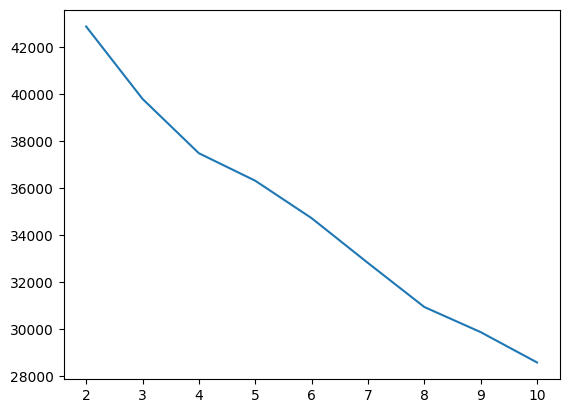

In [ ]:
sns.lineplot(x=range(2, 11), y=inertia_list)

# **4. 실루엣 스코어(Silhouette Score)**
* 군집화의 품질을 평가하는 지표로, 각 데이터가 포인트가 자신의 속한 군집과 얼마나 잘 맞는지, 그리고 다른 군집과 얼마나 잘 구분되는지를 측정
* -1에서 1사아의 값을 가지며, 값이 클수록 군집화의 품질이 높음을 나타냄

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score =[]

for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=2024)
    km.fit(ss_df)
    pred = km.predict(ss_df)
    score.append(silhouette_score(ss_df, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
score

[0.23021433912466954,
 0.14017899641618797,
 0.1573165286310758,
 0.12325837868572198,
 0.11637407813605051,
 0.15042645154594841,
 0.1369180265149236,
 0.13876322067813077,
 0.14964165131428742]

<Axes: >

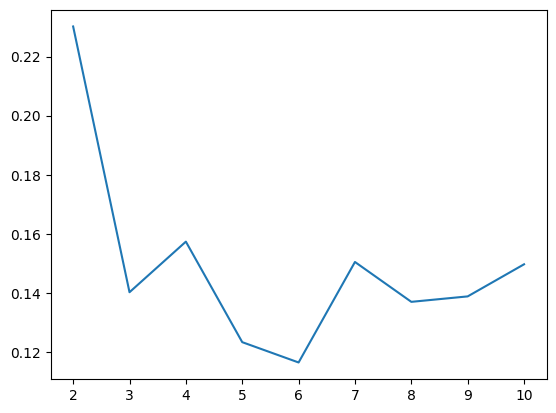

In [ ]:
sns.lineplot(x=range(2,11), y=score)
# 최초로 높은 데이터 4

In [ ]:
km =KMeans(n_clusters=4, random_state=2024)  # 시드값은 항상 같아야함
km.fit(ss_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2024)

In [ ]:
pred = km.predict(ss_df)
pred
# 고객정보의 집합에대한 레이블

array([2, 1, 2, ..., 2, 3, 1], dtype=int32)

In [ ]:
mkt_df['label'] = pred
mkt_df
# label 생김

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single,label
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,21,1617,0,False,False,True,False,False,False,True,2
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,3,27,2,False,False,True,False,False,False,True,1
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,10,776,0,False,False,True,False,False,True,False,2
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,4,53,1,False,False,True,False,False,True,False,1
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,5,422,1,False,False,False,False,True,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,12,1341,1,False,False,True,False,False,True,False,2
2236,1946,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,444,3,False,False,False,False,True,True,False,3
2237,1981,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,5,1241,0,False,False,True,False,False,False,True,2
2238,1956,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,5,843,1,False,False,False,True,False,True,False,3


In [ ]:
mkt_df['label'].value_counts()

label
1    975
2    598
3    588
0     54
Name: count, dtype: int64